# Eksplorasi dan Analisa Data COVID-19 di Indonesia

Sumber data: covid19.go.id

In [1]:
import pandas as pd
import numpy as np
import requests
import datetime, time
import re

In [2]:
from requests.api import head
url_indo = 'https://data.covid19.go.id/public/api/update.json?_=1665726783937'
headers = {'User-Agent': 'Mozilla Firefox'}
indo = requests.get(url_indo, headers =  headers).json()

Data COVID-19 di Indonesia

In [3]:
#Isi dataset
 
#indo['update']['harian']

In [4]:
#Membaca data set ke dalam DataFrame
df_indo = pd.DataFrame(
          data = indo['update']['harian']
)
df_indo.head()

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02T00:00:00.000Z,1583107200000,1,{'value': 0},{'value': 0},{'value': 2},{'value': 2},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
1,2020-03-03T00:00:00.000Z,1583193600000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
2,2020-03-04T00:00:00.000Z,1583280000000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
3,2020-03-05T00:00:00.000Z,1583366400000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
4,2020-03-06T00:00:00.000Z,1583452800000,1,{'value': 0},{'value': 0},{'value': 2},{'value': 2},{'value': 4},{'value': 0},{'value': 0},{'value': 4}


In [5]:
df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']] = df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']].astype(str)

df_indo['jumlah_meninggal'] = df_indo['jumlah_meninggal'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_sembuh'] = df_indo['jumlah_sembuh'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_positif'] = df_indo['jumlah_positif'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_dirawat'] = df_indo['jumlah_dirawat'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_positif_kum'] = df_indo['jumlah_positif_kum'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_sembuh_kum'] = df_indo['jumlah_sembuh_kum'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_meninggal_kum'] = df_indo['jumlah_meninggal_kum'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_dirawat_kum'] = df_indo['jumlah_dirawat_kum'].str.replace('({\'value\':|})','').str.strip()

df_indo.head()

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02T00:00:00.000Z,1583107200000,1,0,0,2,2,2,0,0,2
1,2020-03-03T00:00:00.000Z,1583193600000,1,0,0,0,0,2,0,0,2
2,2020-03-04T00:00:00.000Z,1583280000000,1,0,0,0,0,2,0,0,2
3,2020-03-05T00:00:00.000Z,1583366400000,1,0,0,0,0,2,0,0,2
4,2020-03-06T00:00:00.000Z,1583452800000,1,0,0,2,2,4,0,0,4


In [8]:
#return ke type int
df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']] = df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']].astype(int)
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 11 columns):
key_as_string           966 non-null object
key                     966 non-null int64
doc_count               966 non-null int64
jumlah_meninggal        966 non-null int32
jumlah_sembuh           966 non-null int32
jumlah_positif          966 non-null int32
jumlah_dirawat          966 non-null int32
jumlah_positif_kum      966 non-null int32
jumlah_sembuh_kum       966 non-null int32
jumlah_meninggal_kum    966 non-null int32
jumlah_dirawat_kum      966 non-null int32
dtypes: int32(8), int64(2), object(1)
memory usage: 53.0+ KB


In [9]:
#ubah tanggal dengan datetime
df_indo['key_as_string'] = pd.to_datetime(df_indo['key_as_string'])

day = []
#ubah ke list
key_as_string = df_indo['key_as_string'].tolist()
for i in key_as_string:
    dt = i.strftime('%Y-%m-%d')
    day.append(dt)

df_indo['key_as_string'] = day
df_indo.info()
print(df_indo.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 11 columns):
key_as_string           966 non-null object
key                     966 non-null int64
doc_count               966 non-null int64
jumlah_meninggal        966 non-null int32
jumlah_sembuh           966 non-null int32
jumlah_positif          966 non-null int32
jumlah_dirawat          966 non-null int32
jumlah_positif_kum      966 non-null int32
jumlah_sembuh_kum       966 non-null int32
jumlah_meninggal_kum    966 non-null int32
jumlah_dirawat_kum      966 non-null int32
dtypes: int32(8), int64(2), object(1)
memory usage: 53.0+ KB
  key_as_string            key  doc_count  jumlah_meninggal  jumlah_sembuh  \
0    2020-03-02  1583107200000          1                 0              0   
1    2020-03-03  1583193600000          1                 0              0   
2    2020-03-04  1583280000000          1                 0              0   
3    2020-03-05  1583366400000          1       

In [10]:
#menambah kolom per bulan  
df_indo['date_month'] = df_indo['key_as_string'].apply(lambda x:
datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(df_indo.head(5))

  key_as_string            key  doc_count  jumlah_meninggal  jumlah_sembuh  \
0    2020-03-02  1583107200000          1                 0              0   
1    2020-03-03  1583193600000          1                 0              0   
2    2020-03-04  1583280000000          1                 0              0   
3    2020-03-05  1583366400000          1                 0              0   
4    2020-03-06  1583452800000          1                 0              0   

   jumlah_positif  jumlah_dirawat  jumlah_positif_kum  jumlah_sembuh_kum  \
0               2               2                   2                  0   
1               0               0                   2                  0   
2               0               0                   2                  0   
3               0               0                   2                  0   
4               2               2                   4                  0   

   jumlah_meninggal_kum  jumlah_dirawat_kum date_month  
0                

In [11]:
#ubah kolom key_as_string sebagai tanggal
df_indo.rename(columns = {'key_as_string':'tanggal'}, inplace=True)
df_indo

,tanggal,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum,date_month
0,2020-03-02,1583107200000,1,0,0,2,2,2,0,0,2,2020-03
1,2020-03-03,1583193600000,1,0,0,0,0,2,0,0,2,2020-03
2,2020-03-04,1583280000000,1,0,0,0,0,2,0,0,2,2020-03
3,2020-03-05,1583366400000,1,0,0,0,0,2,0,0,2,2020-03
4,2020-03-06,1583452800000,1,0,0,2,2,4,0,0,4,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...
961,2022-10-19,1666137600000,1,16,1408,2390,966,6462655,6285790,158361,18504,2022-10
962,2022-10-20,1666224000000,1,19,1873,2307,415,6464962,6287663,158380,18919,2022-10
963,2022-10-21,1666310400000,1,18,1970,2227,239,6467189,6289633,158398,19158,2022-10
964,2022-10-22,1666396800000,1,18,2308,2087,-239,6469276,6291941,158416,18919,2022-10


In [12]:
#mengubah kolom key_as_string menjadi datetime

df_indo['tanggal'] = df_indo['tanggal'].astype('datetime64[ns]')
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 12 columns):
tanggal                 966 non-null datetime64[ns]
key                     966 non-null int64
doc_count               966 non-null int64
jumlah_meninggal        966 non-null int32
jumlah_sembuh           966 non-null int32
jumlah_positif          966 non-null int32
jumlah_dirawat          966 non-null int32
jumlah_positif_kum      966 non-null int32
jumlah_sembuh_kum       966 non-null int32
jumlah_meninggal_kum    966 non-null int32
jumlah_dirawat_kum      966 non-null int32
date_month              966 non-null object
dtypes: datetime64[ns](1), int32(8), int64(2), object(1)
memory usage: 60.5+ KB


In [13]:
df_indo

,tanggal,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum,date_month
0,2020-03-02,1583107200000,1,0,0,2,2,2,0,0,2,2020-03
1,2020-03-03,1583193600000,1,0,0,0,0,2,0,0,2,2020-03
2,2020-03-04,1583280000000,1,0,0,0,0,2,0,0,2,2020-03
3,2020-03-05,1583366400000,1,0,0,0,0,2,0,0,2,2020-03
4,2020-03-06,1583452800000,1,0,0,2,2,4,0,0,4,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...
961,2022-10-19,1666137600000,1,16,1408,2390,966,6462655,6285790,158361,18504,2022-10
962,2022-10-20,1666224000000,1,19,1873,2307,415,6464962,6287663,158380,18919,2022-10
963,2022-10-21,1666310400000,1,18,1970,2227,239,6467189,6289633,158398,19158,2022-10
964,2022-10-22,1666396800000,1,18,2308,2087,-239,6469276,6291941,158416,18919,2022-10


# Apa kabar COVID-19 di Indonesia?

Sekarang jalankanlah method keys() pada cov_indo_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

1. Berapa jumlah total kasus COVID di Indonesia? 

2. Berapa persentase kematian akibat COVID-19 di Indonesia? 

3. Berapa persentase tingkat kesembuhan dari COVID-19 di Indonesia?

In [15]:
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()

print('Length of cov_id_raw_new : %d.' %len(cov_indo_raw))
print('Komponen cov_id_raw_new  : %s.' %cov_indo_raw.keys())
cov_id_update_new = cov_indo_raw['update']

print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update_new['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh              :', cov_id_update_new['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal           :', cov_id_update_new['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini  :', cov_id_update_new['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update_new['total']['jumlah_meninggal'])

D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Length of cov_id_raw_new : 2.
Komponen cov_id_raw_new  : dict_keys(['data', 'update']).
Tanggal pembaharuan data penambahan kasus   : 2022-10-23
Jumlah penambahan kasus sembuh              : 1206
Jumlah penambahan kasus meninggal           : 13
Jumlah total kasus positif hingga saat ini  : 6470961
Jumlah total kasus meninggal hingga saat ini: 158429


D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

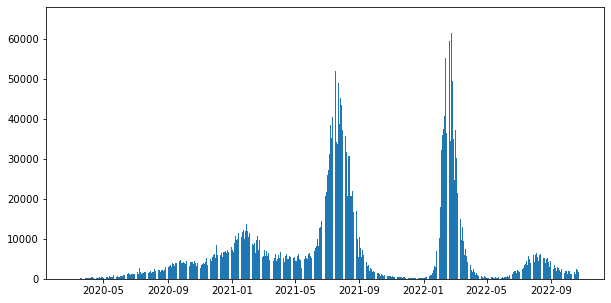

In [16]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )
cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_indo_tidy, x='tanggal', height='kasus_positif')
plt.show()

D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 432x288 with 0 Axes>

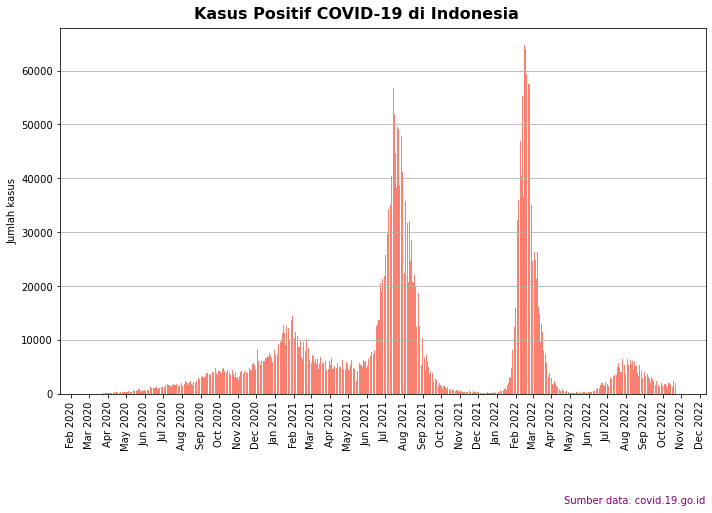

In [17]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )
cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(data=cov_indo_tidy, x='tanggal', height='kasus_positif', color='salmon')
fig.suptitle('Kasus Positif COVID-19 di Indonesia', 
             y=1.02, fontsize=16, fontweight='bold', ha='center')

ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='purple',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<Figure size 432x288 with 0 Axes>

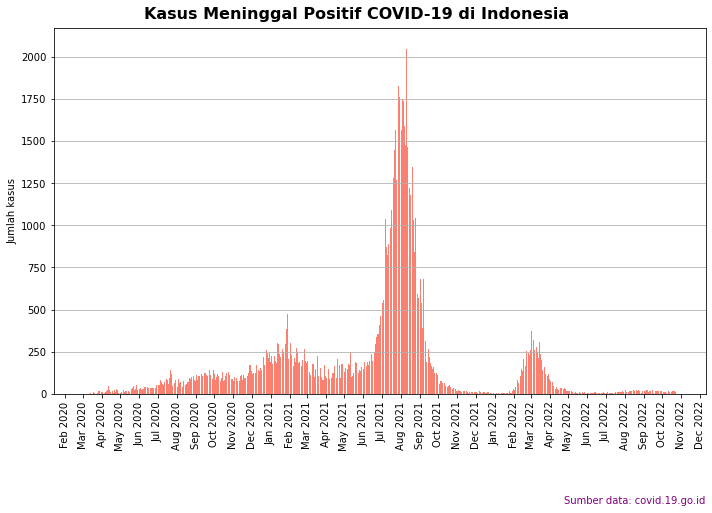

In [18]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('MENINGGAL')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_meninggal': 'kasus_meninggal'})
                  )
cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])



import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(data=cov_indo_tidy, x='tanggal', height='kasus_meninggal', color='salmon')
fig.suptitle('Kasus Meninggal Positif COVID-19 di Indonesia', 
             y=1.02, fontsize=16, fontweight='bold', ha='center')


ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='purple',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

In [19]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )


cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])
cov_indo_pekanan = (cov_indo_tidy.set_index('tanggal')['kasus_positif']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_positif': 'jumlah'})
                    )
cov_indo_pekanan['tahun'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.year)
cov_indo_pekanan['pekan_ke'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_indo_pekanan = cov_indo_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_indo_pekanan:')
print(cov_indo_pekanan.info())
print('\nLima data teratas cov_indo_pekanan:\n', cov_indo_pekanan.head())

D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Info cov_indo_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
tahun       138 non-null int64
pekan_ke    138 non-null int64
jumlah      138 non-null int32
dtypes: int32(1), int64(2)
memory usage: 2.8 KB
None

Lima data teratas cov_indo_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       6
1   2020        11     111
2   2020        12     397
3   2020        13     771
4   2020        14     988


In [20]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )


cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])
cov_indo_pekanan = (cov_indo_tidy.set_index('tanggal')['kasus_positif']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_positif': 'jumlah'})
                    )
cov_indo_pekanan['tahun'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.year)
cov_indo_pekanan['pekan_ke'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_indo_pekanan = cov_indo_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_indo_pekanan['jumlah_pekanlalu'] = cov_indo_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_indo_pekanan['lebih_baik'] = cov_indo_pekanan['jumlah'] < cov_indo_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_indo_pekanan.head(10))

print('Info cov_indo_pekanan:')
print(cov_indo_pekanan.info())
print('\nLima data teratas cov_indo_pekanan:\n', cov_indo_pekanan.head())

D:\APLIKASI MATEMATIKA\WPy64-3760\python-3.7.6.amd64\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       6                 0       False
1   2020        11     111                 6       False
2   2020        12     397               111       False
3   2020        13     771               397       False
4   2020        14     988               771       False
5   2020        15    1968               988       False
6   2020        16    2334              1968       False
7   2020        17    2307              2334        True
8   2020        18    2310              2307       False
9   2020        19    2840              2310       False
Info cov_indo_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
tahun               138 non-null int64
pekan_ke            138 non-null int64
jumlah              138 non-null int32
jumlah_pekanlalu    138 non-null int32
lebih_baik          138 non-null bool
dtypes: bool(1), int32(2), in

Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

<Figure size 432x288 with 0 Axes>

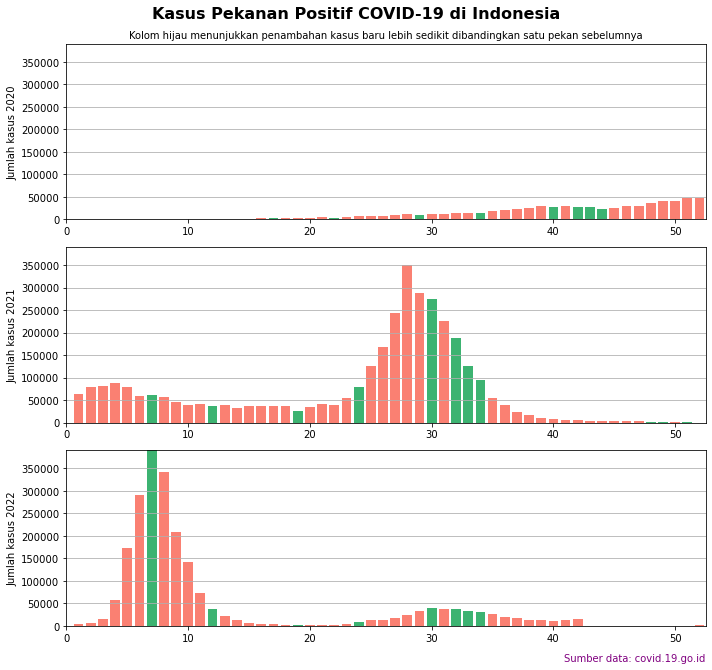

In [21]:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_indo_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_indo_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Indonesia', 
             y=1.02, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_indo_pekanan.loc[cov_indo_pekanan['tahun']==tahun_terjadi_covid19[i]], 
           x='pekan_ke', height='jumlah', 
           color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_indo_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='purple',
            ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_indo_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

#url_prov = 'https://data.covid19.go.id/public/api/prov.json?_=1665726783940'
#url_kab = 'https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json?_=1665727203003'